In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.insert(0, '..')

import numpy as np

from matplotlib import pyplot as plt
from batchflow import plot

from src.loader import ImagesDataset

In [3]:
seed = 11
rng = np.random.default_rng(seed)

In [4]:
%%time

data_path = '../images'

dataset = ImagesDataset(path=data_path)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/203 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 2.28 s, sys: 155 ms, total: 2.43 s
Wall time: 2.85 s


/Users/gorya/Code/taine/notebooks/../src/loader.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs['preloaded'] = {'images': np.array(images), 'labels': np.array(labels)}


Classes are imbalanced, loss weighting might be a good idea.

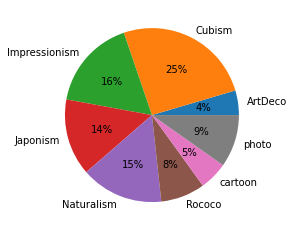

In [5]:
labels, counts = np.unique(dataset.labels, return_counts=True)
plt.pie(counts, labels=labels, autopct="%d%%");

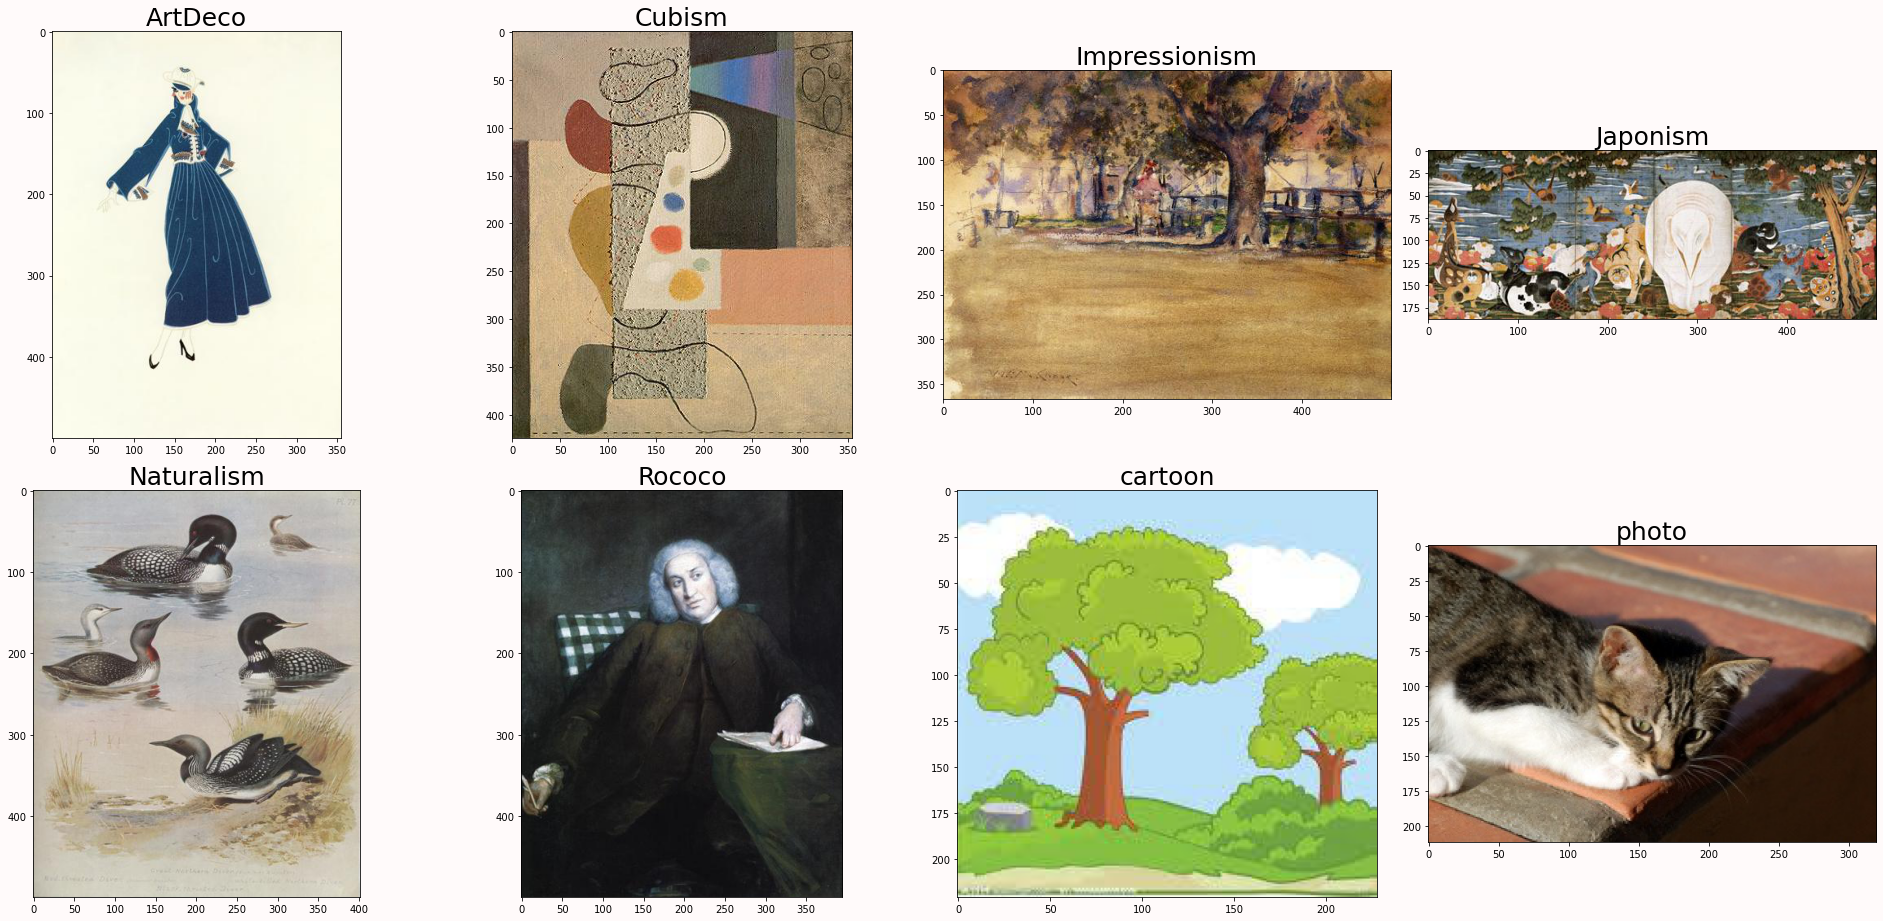

In [11]:
indices = [rng.choice(np.nonzero(dataset.labels == label)[0]) for label in labels]
images = list(dataset.images[indices])
labels = list(dataset.labels[indices])
plot(data=images, title=labels, combine='separate')